In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

In [6]:
# Inverse transform to original scale (if you scaled data)

df = pd.read_csv('server_metrics.csv', parse_dates=['timestamp'])
df.set_index('timestamp', inplace=True)
features = ['cpu_percent', 'memory_percent', 'load_avg', 'active_connections']
df = df[features].fillna(method='ffill')

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Sequence creation
def create_sequences(data, target_index, window=30):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i - window:i])
        y.append(data[i, target_index])
    return np.array(X), np.array(y)

target_index = 0  # cpu_load
X, y = create_sequences(scaled_data, target_index)

# Train-test split
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

model = Sequential()
model.add(LSTM(64, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Train
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Predict
y_pred = model.predict(X_test)

y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))

Epoch 1/10


/var/folders/tf/m95fdf551gg5k42lhg529ln80000gn/T/ipykernel_58458/4246743160.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df[features].fillna(method='ffill')
/Users/lokranjan/PycharmProjects/2FA/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - loss: 0.2748 - val_loss: 0.2050
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1217 - val_loss: 0.0888
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0587 - val_loss: 0.0274
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0625 - val_loss: 0.0095
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0735 - val_loss: 0.0103
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0787 - val_loss: 0.0201
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0637 - val_loss: 0.0349
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0516 - val_loss: 0.0506
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0524 - val_loss: 0.0646
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0511 - val_loss: 0.0740
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


ValueError: non-broadcastable output operand with shape (13,1) doesn't match the broadcast shape (13,4)

In [8]:
plt.figure(figsize=(12, 5))
plt.plot(range(len(y_test_inv[-50:])), y_test_inv[-50:], label='Actual')
plt.plot(range(len(y_pred_inv[-50:])), y_pred_inv[-50:], label='Predicted')
plt.title('📈 LSTM Forecast: Future CPU Usage (Last 50 Timesteps)', fontsize=14)
plt.xlabel('Timestep')
plt.ylabel('CPU Usage (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'y_test_inv' is not defined

<Figure size 1200x500 with 0 Axes>

Epoch 1/20


/Users/lokranjan/PycharmProjects/2FA/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step - loss: 0.4359
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.3864
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3423
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.3023
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2655
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2314
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1996
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1701
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1434
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1202
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1019
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0902
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0862
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0881
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0915
Epoch 16/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms

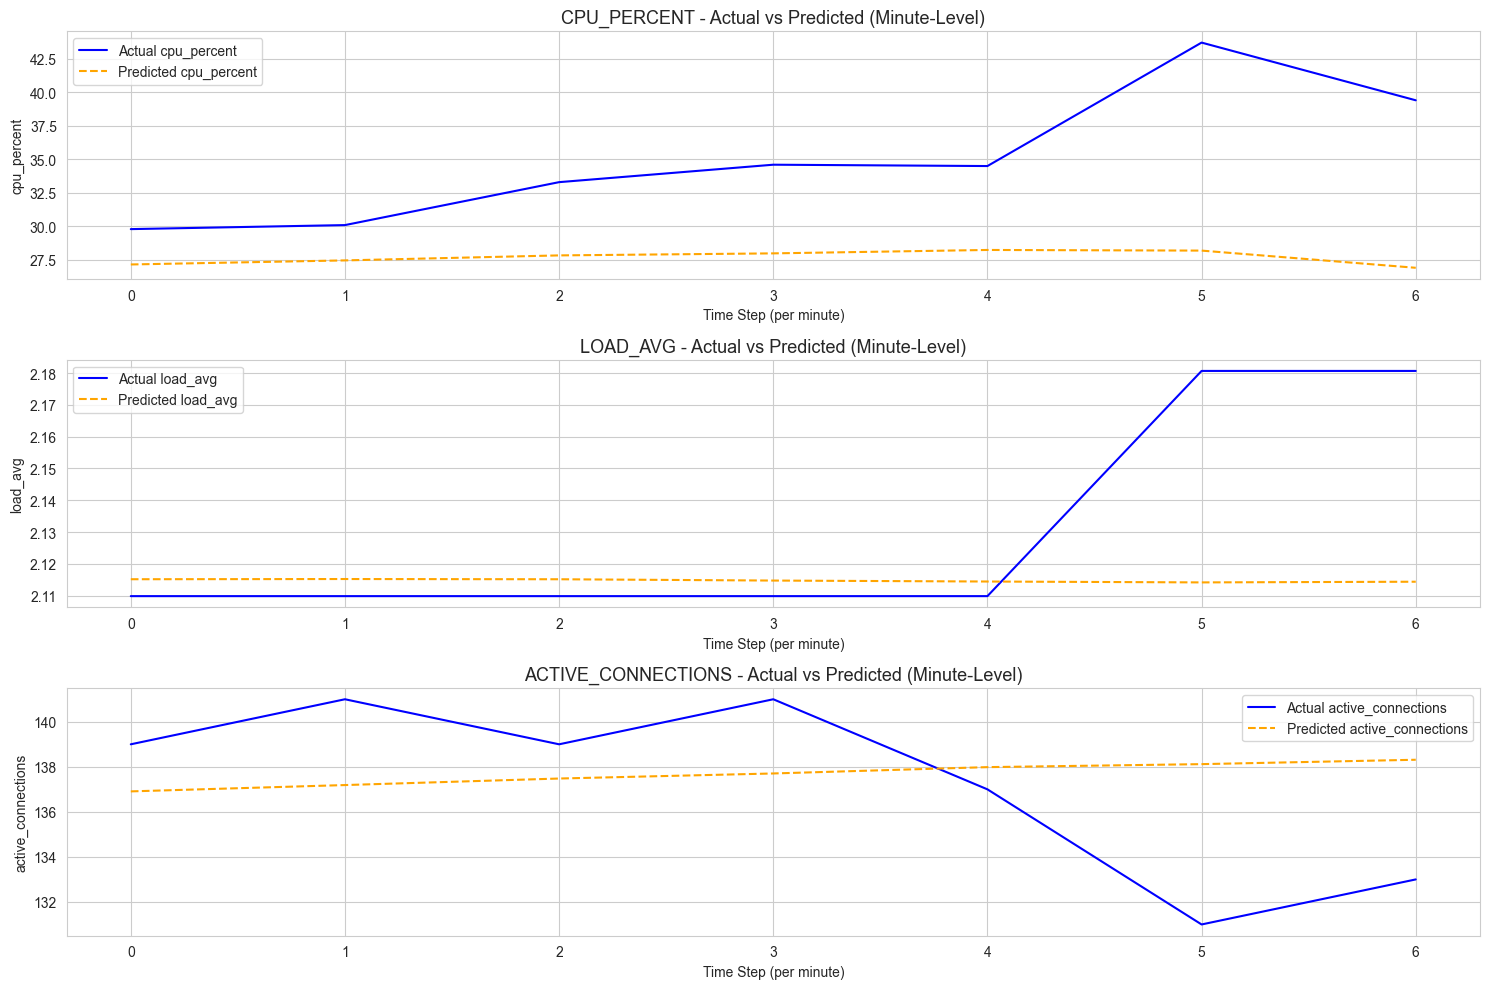

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("server_metrics.csv")  # Replace with actual file
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')

# Select relevant features
features = ['cpu_percent', 'load_avg', 'active_connections']
data = df[features]

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Sequence prep (1-minute interval prediction)
SEQ_LEN = 60  # Look back 60 minutes
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, SEQ_LEN)

# Train/Test Split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Model definition
model = Sequential([
    LSTM(64, input_shape=(SEQ_LEN, len(features))),
    Dense(len(features))
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predictions
y_pred = model.predict(X_test)

# Inverse transform to real values
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Plotting (sexy titles included 😎)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i+1)
    plt.plot(y_test_inv[:, i], label=f'Actual {feature}', color='blue')
    plt.plot(y_pred_inv[:, i], label=f'Predicted {feature}', color='orange', linestyle='--')
    plt.title(f'{feature.upper()} - Actual vs Predicted (Minute-Level)', fontsize=13)
    plt.xlabel("Time Step (per minute)")
    plt.ylabel(feature)
    plt.legend()

plt.tight_layout()
plt.show()

In [10]:
df = df.sort_values('timestamp')
df.set_index('timestamp', inplace=True)
print(df.index.to_series().diff().value_counts())

timestamp
0 days 00:00:00    66
0 days 00:00:01    25
Name: count, dtype: int64


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load dataset
df = pd.read_csv('server_metrics.csv')  # Replace with your actual filename
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Resample to 10-second intervals and interpolate missing data
df = df.resample('10S').mean().interpolate()

# Select features
features = ['cpu_percent', 'load_avg', 'active_connections']
data = df[features].values

# Normalize
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences
SEQ_LEN = 30  # Past 5 minutes of data (30 timesteps * 10s)
X, y = [], []
for i in range(len(data_scaled) - SEQ_LEN):
    X.append(data_scaled[i:i+SEQ_LEN])
    y.append(data_scaled[i+SEQ_LEN])
X, y = np.array(X), np.array(y)

# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define model
model = Sequential([
    LSTM(64, input_shape=(SEQ_LEN, len(features))),
    Dense(len(features))
])
model.compile(optimizer=Adam(0.001), loss='mse')
model.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)

# Predict
y_pred = model.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Plotting
for i, feat in enumerate(features):
    plt.figure(figsize=(12, 4))
    plt.plot(y_test_inv[:, i], label='Actual ' + feat)
    plt.plot(y_pred_inv[:, i], label='Predicted ' + feat)
    plt.title(f"LSTM Forecasting - {feat} every 10 seconds")
    plt.xlabel("Time Steps (10s intervals)")
    plt.ylabel(feat)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Evaluation
for i, feat in enumerate(features):
    rmse = np.sqrt(mean_squared_error(y_test_inv[:, i], y_pred_inv[:, i]))
    mae = mean_absolute_error(y_test_inv[:, i], y_pred_inv[:, i])
    print(f"{feat} - RMSE: {rmse:.4f}, MAE: {mae:.4f}")


Epoch 1/15


/var/folders/tf/m95fdf551gg5k42lhg529ln80000gn/T/ipykernel_58458/3185409012.py:16: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df = df.resample('10S').mean().interpolate()
/Users/lokranjan/PycharmProjects/2FA/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32,), dtype=float32). Expected shape (None, 30, 3), but input has incompatible shape (32,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32,), dtype=float32)
  • training=True
  • mask=None

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = pd.read_csv('server_metrics.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Resample to 10 second intervals and interpolate
df = df.resample('10S').mean().interpolate()

# Define targets and corresponding SEQ_LENs
targets = {
    'cpu_percent': 30,
    'load_avg': 30,
    'active_connections': 90
}

results = {}

for feature, SEQ_LEN in targets.items():
    print(f"\nTraining model for: {feature} with SEQ_LEN = {SEQ_LEN}")

    data = df[[feature]].values
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)

    X, y = [], []
    for i in range(len(data_scaled) - SEQ_LEN):
        X.append(data_scaled[i:i+SEQ_LEN])
        y.append(data_scaled[i+SEQ_LEN])
    X, y = np.array(X), np.array(y)

    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    model = Sequential([
        LSTM(64, input_shape=(SEQ_LEN, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)

    y_pred = model.predict(X_test)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred_inv = scaler.inverse_transform(y_pred)

    # Plotting
    plt.figure(figsize=(12, 4))
    plt.plot(y_test_inv, label='Actual')
    plt.plot(y_pred_inv, label='Predicted')
    plt.title(f"Forecasting {feature} (SEQ_LEN={SEQ_LEN})")
    plt.xlabel("Time Steps (10s)")
    plt.ylabel(feature)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Evaluation
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    results[feature] = (mae, rmse)

# Print evaluation summary
print("\n📊 Evaluation Summary:")
for feat, (mae, rmse) in results.items():
    print(f"{feat} — MAE: {mae:.4f}, RMSE: {rmse:.4f}")



Training model for: cpu_percent with SEQ_LEN = 30
Epoch 1/15


/var/folders/tf/m95fdf551gg5k42lhg529ln80000gn/T/ipykernel_58458/1764131180.py:14: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df = df.resample('10S').mean().interpolate()
/Users/lokranjan/PycharmProjects/2FA/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32,), dtype=float32). Expected shape (None, 30, 1), but input has incompatible shape (32,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32,), dtype=float32)
  • training=True
  • mask=None